In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/grammar-correction/Grammar Correction.csv


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [4]:
df = pd.read_csv('/kaggle/input/grammar-correction/Grammar Correction.csv')
df.head()

,Serial Number,Error Type,Ungrammatical Statement,Standard English
0,1,Verb Tense Errors,I goes to the store everyday.,I go to the store everyday.
1,2,Verb Tense Errors,They was playing soccer last night.,They were playing soccer last night.
2,3,Verb Tense Errors,She have completed her homework.,She has completed her homework.
3,4,Verb Tense Errors,He don't know the answer.,He doesn't know the answer.
4,5,Verb Tense Errors,The sun rise in the east.,The sun rises in the east.


In [5]:
df.columns

Index(['Serial Number', 'Error Type', 'Ungrammatical Statement',
       'Standard English'],
      dtype='object')

In [6]:
# Check for missing values
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 Serial Number              0
Error Type                 0
Ungrammatical Statement    0
Standard English           0
dtype: int64


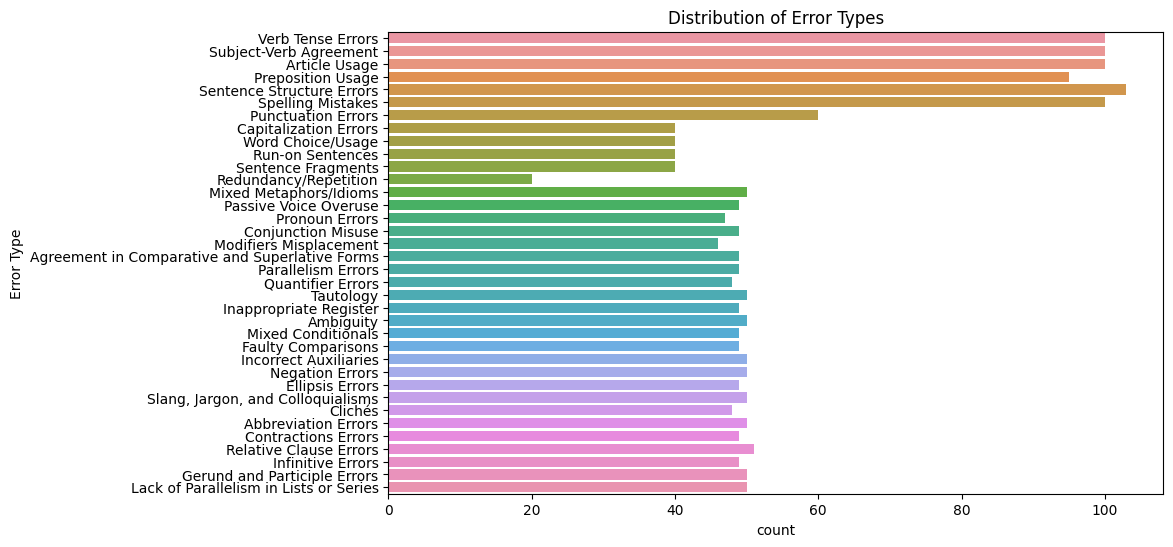

In [7]:
# Visualize error type distribution
plt.figure(figsize=(10,6))
sns.countplot(y='Error Type', data=df)
plt.title('Distribution of Error Types')
plt.show()

In [8]:
# Drop rows with missing values
df = df.dropna()

In [9]:
# Prepare features and target
X = df['Ungrammatical Statement']
y = df['Error Type']

In [10]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Convert text to numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [12]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    
    
    'Random Forest': RandomForestClassifier()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))

# Find best model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name} with accuracy {results[best_model_name]:.2f}")

Logistic Regression Accuracy: 0.39
                                                precision    recall  f1-score   support

                           Abbreviation Errors       0.00      0.00      0.00         9
Agreement in Comparative and Superlative Forms       1.00      0.91      0.95        11
                                     Ambiguity       0.00      0.00      0.00        11
                                 Article Usage       0.29      0.55      0.37        22
                         Capitalization Errors       0.00      0.00      0.00         6
                                       Clichés       1.00      0.11      0.20         9
                            Conjunction Misuse       0.53      0.80      0.64        10
                           Contractions Errors       0.20      0.14      0.17         7
                               Ellipsis Errors       0.00      0.00      0.00        12
                            Faulty Comparisons       0.73      0.92      0.81       

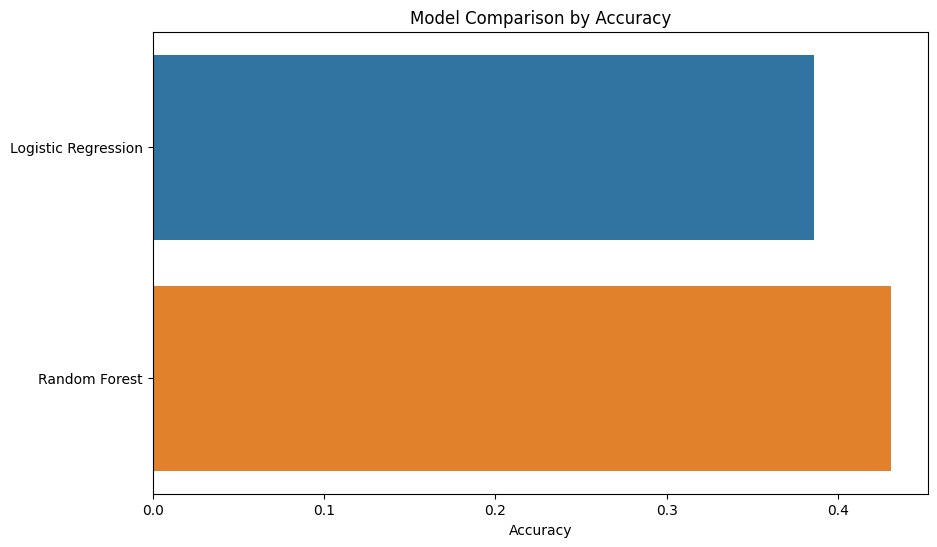


Sample Predictions:

Ungrammatical: The ct scan revealed no abnormalities.
Predicted Error: Negation Errors

Ungrammatical: He do his homework every evening.
Predicted Error: Incorrect Auxiliaries

Ungrammatical: Can you tell me the currant exchange rate?
Predicted Error: Clichés

Ungrammatical: 46. I can't believe how fast my daughter is groing up.
Predicted Error: Mixed Metaphors/Idioms

Ungrammatical: The waitress is take our order.
Predicted Error: Verb Tense Errors


In [13]:
# Plot model accuracies
plt.figure(figsize=(10,6))
sns.barplot(x=list(results.values()), y=list(results.keys()))
plt.title('Model Comparison by Accuracy')
plt.xlabel('Accuracy')
plt.show()

# Visualize some predictions
sample = X_test.sample(5, random_state=42)
sample_vec = vectorizer.transform(sample)
predictions = best_model.predict(sample_vec)

print("\nSample Predictions:")
for text, pred in zip(sample, predictions):
    print(f"\nUngrammatical: {text}")
    print(f"Predicted Error: {pred}")